#Stochastic Gradient Descent


discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. 

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. 

Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:
<ol>
<li>Efficiency.
<li>Ease of implementation (lots of opportunities for code tuning).
</ol>

The disadvantages of Stochastic Gradient Descent include:
<ol>
<li>SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
<li>SGD is sensitive to feature scaling.
</ol>

http://scikit-learn.org/stable/modules/sgd.html

The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification.

In [1]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]  #N_samples, N_features - training samples
y = [0, 1]  # n_samples - target values for training the samples
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [2]:
clf.predict([[2.,2.]])  # predict new value

array([1])

In [3]:
clf.coef_   # fits a linear model to the training data ,  coef_ holds the model parameters

array([[ 9.91080278,  9.91080278]])

In [4]:
clf.intercept_   # contains the offset of the linear equation

array([-9.99002993])

In [5]:
 clf.decision_function([[2., 2.]])   

array([ 29.65318117])

The concrete loss function can be set via the loss parameter. SGDClassifier supports the following loss functions:
<ul>
<li>loss="hinge": (soft-margin) linear Support Vector Machine,
<li>loss="modified_huber": smoothed hinge loss,
<li>loss="log": logistic regression,
<li>and all regression losses below.
</ul>

The first two loss functions are lazy, they only update the model parameters if an example violates the margin constraint, which makes training very efficient and may result in sparser models, even when L2 penalty is used.
Using loss="log" or loss="modified_huber" enables the predict_proba method, which gives a vector of probability estimates P(y|x) per sample x:

In [6]:
clf = SGDClassifier(loss="log").fit(X, y)
clf.predict_proba([[1., 1.]])  

array([[  4.97248476e-07,   9.99999503e-01]])

The default setting is penalty="l2". The L1 penalty leads to sparse solutions, driving most coefficients to zero. The Elastic Net solves some deficiencies of the L1 penalty in the presence of highly correlated attributes. The parameter l1_ratio controls the convex combination of L1 and L2 penalty.

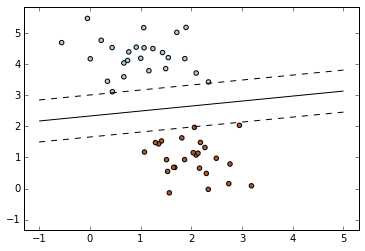

In [10]:
%matplotlib inline
# SGD: Maximum Margin Separating hyperplan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, n_iter=200, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([x1, x2])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()
